In [1]:
# read dataframe

import numpy as np
import pandas as pd

# %%
df = pd.read_csv("toy_data.txt", delimiter="\t")


In [2]:
X_train = df.iloc[:, 0:2].values
y_train = df.iloc[:, 2].values


In [3]:
np.bincount(
    y_train,
)


array([10, 10], dtype=int64)

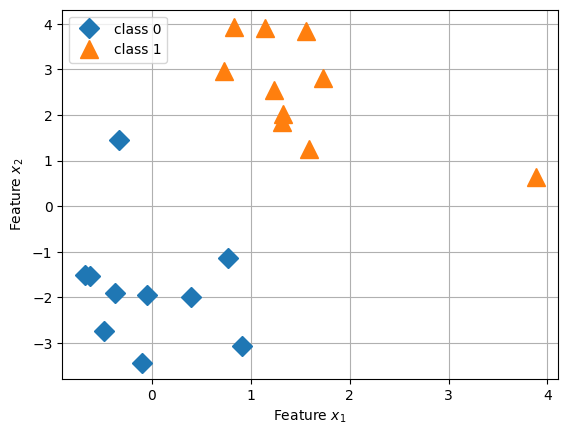

In [4]:
# plotting

import matplotlib.pyplot as plt

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="class 0",
)


plt.plot(
    X_train[y_train == 1, 0],  # first feature
    X_train[y_train == 1, 1],  # second feature,
    marker="^",
    markersize=13,
    linestyle="",
    label="class 1",
)
plt.legend(loc=2)
plt.grid()
plt.xlabel("Feature $x_1$")
plt.ylabel("Feature $x_2$")
plt.show()


# Perceptron

In [5]:
class Perceptron:
    def __init__(self, n_features):
        self.n_feat = n_features
        self.weights = np.random.normal(0, 1, self.n_feat)
        self.bias = 0

    def forward(self, x):

        z = np.dot(x, self.weights) + self.bias
        return 1 if z > 0 else 0

    def update(self, x, y, lr=0.1):
        pred = self.forward(x)
        error = y - pred
        self.bias += error

        for i, _ in enumerate(self.weights):
            self.weights[i] += lr * (error * x[i])

        return error


def train(model, all_x, all_y, epochs=100, lr=0.1):
    for epoch in range(epochs):
        error_count = 0
        plot_decision_boundary(model, all_x, all_y)
        print(f"Acurracy: {compute_accuracy(model, all_x, all_y)*100}%")
        for x, y in zip(all_x, all_y):
            error = model.update(x, y, lr)
            error_count += abs(error)
        print(f"Epoch: {epoch} Error count: {error_count}")

        if error_count == 0:
            break
    return model


def calculate_decision_boundary(model, x):
    return -(model.weights[0] / model.weights[1]) * x - (model.bias / model.weights[1])


def plot_decision_boundary(model, X, y):

    x2 = calculate_decision_boundary(model, X[:, 0])

    plt.plot(
        X[y == 0, 0],
        X[y == 0, 1],
        marker="D",
        markersize=10,
        linestyle="",
        label="class 0",
    )

    plt.plot(
        X_train[y == 1, 0],  # first feature
        X_train[y == 1, 1],  # second feature,
        marker="^",
        markersize=13,
        linestyle="",
        label="class 1",
    )

    # decision boundary

    plt.plot(X[:, 0], x2, color="black", label="decision boundary")

    plt.legend(loc="best")
    plt.grid()
    plt.xlabel("Feature $x_1$")
    plt.ylabel("Feature $x_2$")
    plt.show()


def compute_accuracy(model, all_x, all_y):

    correct = 0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)


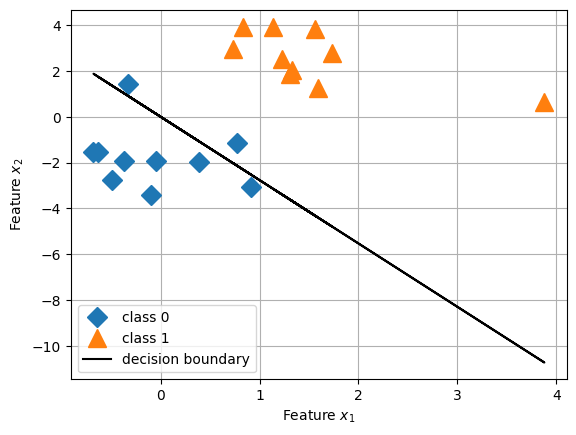

Acurracy: 90.0%
Epoch: 0 Error count: 2


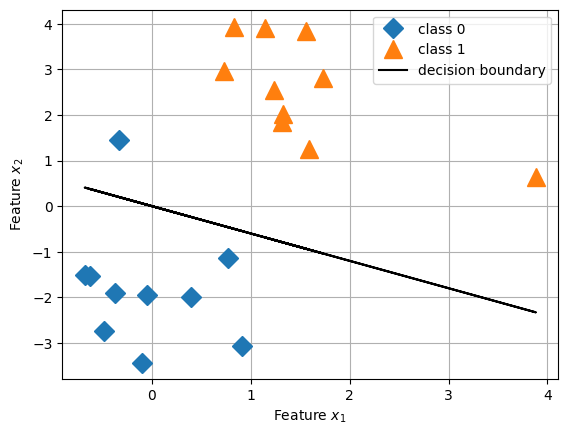

Acurracy: 95.0%
Epoch: 1 Error count: 1


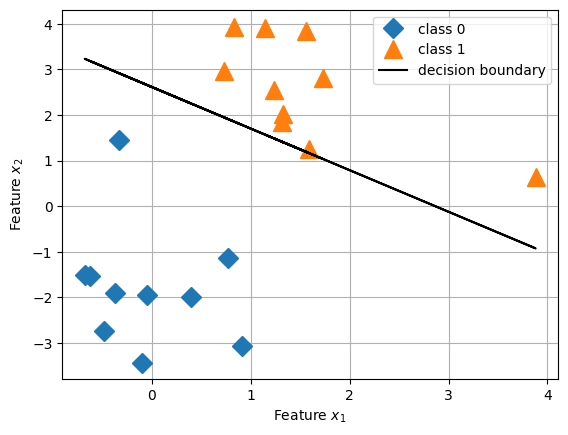

Acurracy: 100.0%
Epoch: 2 Error count: 0


In [6]:
ppn = Perceptron(2)

trained_model = train(ppn, X_train, y_train, epochs=30, lr=0.1)


In [7]:
compute_accuracy(trained_model, X_train, y_train)


1.0